In [32]:
#1
import pandas as pd

url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
df = pd.read_csv(url)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [33]:
#2
null_columns = df.columns[df.isnull().any()]
print("Features with Null values:", null_columns)


Features with Null values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [34]:
#3
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

#print(df)


<ipython-input-34-f69c8b811525>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-34-f69c8b811525>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

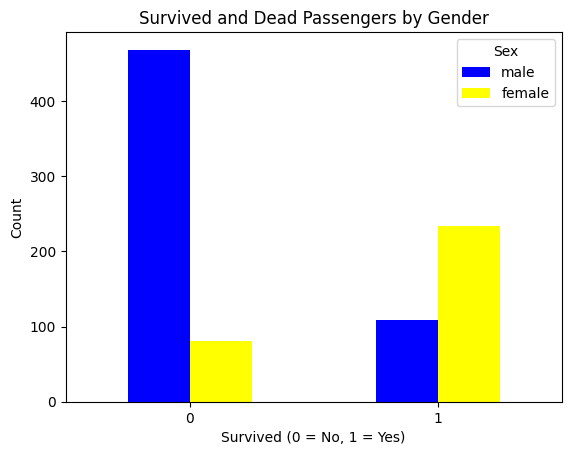

In [35]:
#4
import matplotlib.pyplot as plt

survived_gender = df.groupby(['Survived', 'Sex']).size().unstack()

survived_gender = survived_gender[['male', 'female']]

fig, ax = plt.subplots()
survived_gender.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'yellow'])

ax.set_title('Survived and Dead Passengers by Gender')
ax.set_xlabel('Survived (0 = No, 1 = Yes)')
ax.set_ylabel('Count')
ax.legend(title='Sex')
plt.xticks(rotation=0)

plt.show()


In [36]:
"""import matplotlib.pyplot as plt
import seaborn as sns

# Plot the dataset with 2 bars; Survived, Dead by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette={'male': 'blue', 'female': 'yellow'})
plt.title('Survived and Dead Passengers by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()"""


"import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Plot the dataset with 2 bars; Survived, Dead by gender\nsns.countplot(x='Survived', hue='Sex', data=df, palette={'male': 'blue', 'female': 'yellow'})\nplt.title('Survived and Dead Passengers by Gender')\nplt.xlabel('Survived (0 = No, 1 = Yes)')\nplt.ylabel('Count')\nplt.show()"

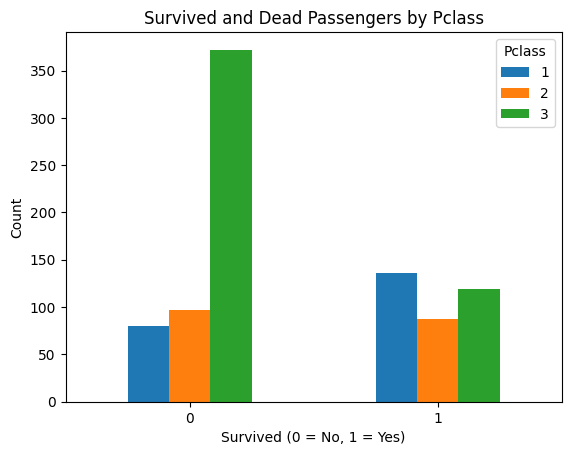

In [37]:
#5
import matplotlib.pyplot as plt

survived_pclass = df.groupby(['Survived', 'Pclass']).size().unstack()

fig, ax = plt.subplots()
survived_pclass.plot(kind='bar', stacked=False, ax=ax)

ax.set_title('Survived and Dead Passengers by Pclass')
ax.set_xlabel('Survived (0 = No, 1 = Yes)')
ax.set_ylabel('Count')
ax.legend(title='Pclass')
plt.xticks(rotation=0)

plt.show()


In [38]:
"""sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survived and Dead Passengers by Pclass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
"""

"sns.countplot(x='Survived', hue='Pclass', data=df)\nplt.title('Survived and Dead Passengers by Pclass')\nplt.xlabel('Survived (0 = No, 1 = Yes)')\nplt.ylabel('Count')\nplt.show()\n"

In [39]:
#6
import pandas as pd

url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
df = pd.read_csv(url)

def categorize_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(categorize_age)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  AgeClass  
0      0         A/5 21171   7.2500   NaN        S         1  
1      0          PC 17599  71.2833   C85        C         3  
2      0  STON/O2. 3101282   7.9250   NaN        S         1  
3      0            113803  53.1000  C123        S         2  
4    

In [40]:
"""
df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, df['Age'].max()], labels=[0, 1, 2, 3, 4], include_lowest=True)

# Display the first few rows of the dataframe to check the new column
print(df.head())
"""


"\ndf['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, df['Age'].max()], labels=[0, 1, 2, 3, 4], include_lowest=True)\n\n# Display the first few rows of the dataframe to check the new column\nprint(df.head())\n"

In [41]:
#7
df.drop('Age', axis=1, inplace=True)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare Cabin Embarked  AgeClass  
0         A/5 21171   7.2500   NaN        S         1  
1          PC 17599  71.2833   C85        C         3  
2  STON/O2. 3101282   7.9250   NaN        S         1  
3            113803  53.1000  C123        S         2  
4            373450   8.0500   NaN

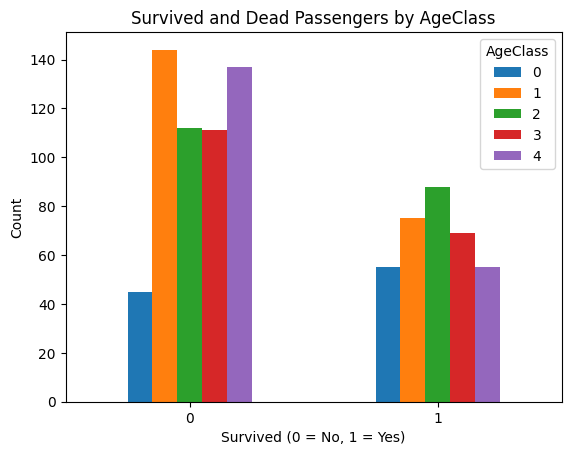

In [42]:
#8
import matplotlib.pyplot as plt

survived_ageclass = df.groupby(['Survived', 'AgeClass']).size().unstack()

fig, ax = plt.subplots()
survived_ageclass.plot(kind='bar', stacked=False, ax=ax)

ax.set_title('Survived and Dead Passengers by AgeClass')
ax.set_xlabel('Survived (0 = No, 1 = Yes)')
ax.set_ylabel('Count')
ax.legend(title='AgeClass')
plt.xticks(rotation=0)

plt.show()


In [43]:
"""sns.countplot(x='Survived', hue='AgeClass', data=df)
plt.title('Survived and Dead Passengers by AgeClass')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()"""


"sns.countplot(x='Survived', hue='AgeClass', data=df)\nplt.title('Survived and Dead Passengers by AgeClass')\nplt.xlabel('Survived (0 = No, 1 = Yes)')\nplt.ylabel('Count')\nplt.show()"